In [1]:
# Data processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# label encoder,Standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler

# Modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC

# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

# Validation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# DATA ANALYSIS

In [7]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#There are null values for Item_Weight and Outlet_Size

In [9]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
data.shape

(8523, 12)

In [14]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
data['Item_Identifier'].dtypes

dtype('O')

In [18]:
num_cols = [features for features in data.columns if data[features].dtypes !='O']

In [19]:
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [20]:
data[num_cols].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [21]:
data[num_cols].nunique()

Item_Weight                   415
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

In [22]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [23]:
#Check for distribution of Continuous numerical values

C:\Users\docsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

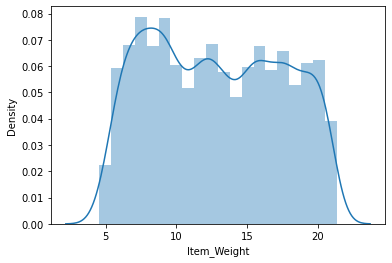

In [24]:
sns.distplot(data['Item_Weight'])

<AxesSubplot:xlabel='Item_Weight'>

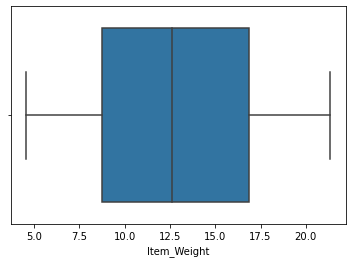

In [25]:
sns.boxplot(x=data['Item_Weight'])

C:\Users\docsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

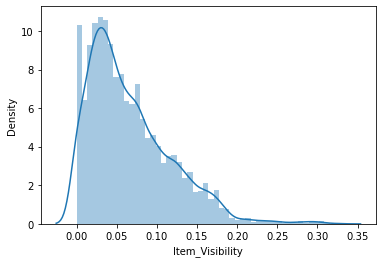

In [27]:
sns.distplot(data['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility'>

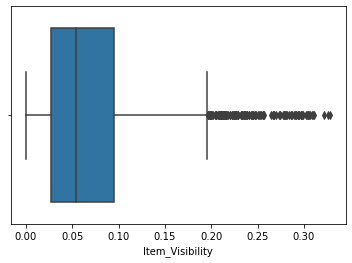

In [28]:
sns.boxplot(x=data['Item_Visibility'])

In [31]:
#Item_Visibility has outliers

C:\Users\docsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

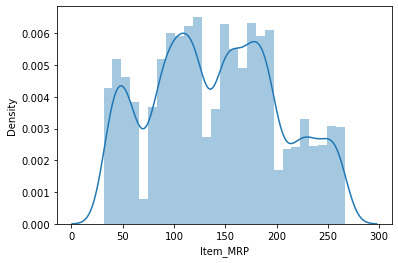

In [29]:
sns.distplot(data['Item_MRP'])

<AxesSubplot:xlabel='Item_MRP'>

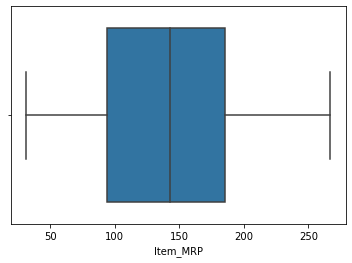

In [30]:
sns.boxplot(x=data['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

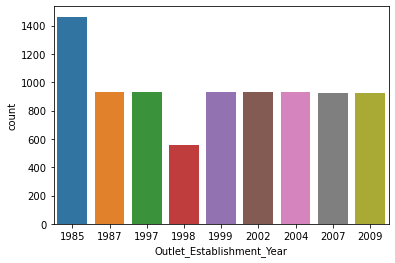

In [32]:
sns.countplot(x = 'Outlet_Establishment_Year', data=data)

C:\Users\docsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Visibility'>

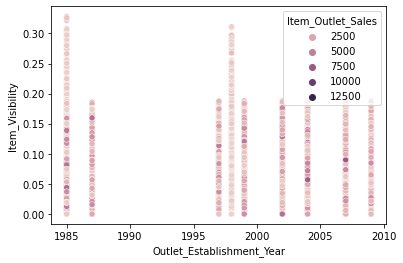

In [33]:
sns.scatterplot(data['Outlet_Establishment_Year'], data['Item_Visibility'],hue= data['Item_Outlet_Sales'])

# PREPROCESSING

In [35]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [37]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
#Checking the skewness of data

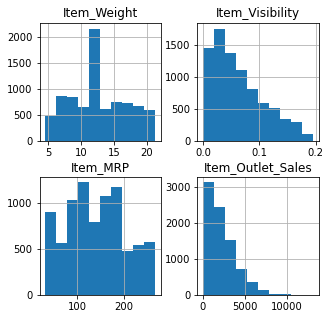

In [61]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(5,5))
plt.show()

In [62]:
#Replacing the missing values with median

In [63]:
data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace=True)

In [64]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [65]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [66]:
# All Null values have been removed

In [67]:
Q1=np.percentile(data['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(data['Item_Visibility'],50,interpolation='midpoint')
Q3=np.percentile(data['Item_Visibility'],75,interpolation='midpoint')
print(Q1,'\n',Q2,'\n',Q3)

0.0267894435 
 0.05272914 
 0.0922772425


In [68]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR
print(IQR,'\n',low_limit,'\n',Up_limit)

0.065487799 
 -0.071442255 
 0.190508941


In [69]:
outlier=[]
for x in data['Item_Visibility']:
    if((x>Up_limit) or (x<low_limit)):
        outlier.append(x)

In [70]:
print(outlier)

[0.195068226, 0.191013663, 0.193772568, 0.192650072, 0.191008614, 0.191603334, 0.19244045, 0.192540665, 0.195688803, 0.193477995, 0.191500528, 0.194874778, 0.195721125, 0.190711254, 0.190569038]


In [71]:
indx1=data['Item_Visibility'][(data['Item_Visibility']>Up_limit)|(data['Item_Visibility']<low_limit)].index
data.loc[indx1].index

Int64Index([  65,  178,  284,  489, 1845, 3432, 3948, 3960, 4229, 4851, 5022,
            5461, 5636, 5994, 7432],
           dtype='int64')

In [72]:
data.drop(data.loc[indx1].index,inplace=True)

<AxesSubplot:xlabel='Item_Visibility'>

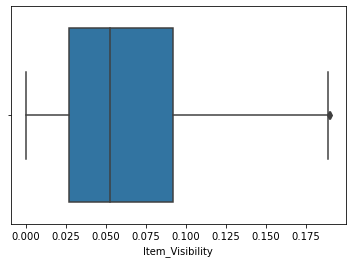

In [73]:
sns.boxplot(x=data['Item_Visibility'])

In [74]:
#Outlier has been removed

In [75]:
data['Item_Identifier'].value_counts()

FDW13    10
FDX31     9
NCB18     9
NCQ06     9
DRE49     9
         ..
FDN52     1
DRE01     1
FDO33     1
FDC23     1
FDK57     1
Name: Item_Identifier, Length: 1558, dtype: int64

In [76]:
data['Item_Identifier'].unique

<bound method Series.unique of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8364, dtype: object>

In [77]:
data['Item_Fat_Content'].value_counts()

Low Fat    5009
Regular    2825
LF          306
reg         115
low fat     109
Name: Item_Fat_Content, dtype: int64

In [78]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1206
Snack Foods              1180
Household                 897
Frozen Foods              843
Dairy                     668
Canned                    638
Baking Goods              629
Health and Hygiene        514
Soft Drinks               437
Meat                      418
Breads                    247
Hard Drinks               211
Others                    166
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64

In [83]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Supermarket Type3     935
Supermarket Type2     928
Grocery Store         924
Name: Outlet_Type, dtype: int64

In [79]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [86]:
#Label encoding categorical data

col = ['Item_Identifier','Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type']
label_encoder= LabelEncoder()
data[col] = data[col].apply(label_encoder.fit_transform)

In [87]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1120,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1296,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [91]:
sc=MinMaxScaler()
data['Item_MRP'] = sc.fit_transform(data[['Item_MRP']])


In [92]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,0.927507,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,0.072068,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,0.468288,9,1999,1,0,1,2097.2700
3,1120,19.20,2,0.000000,6,0.640093,0,1998,1,2,0,732.3800
4,1296,8.93,1,0.000000,9,0.095805,1,1987,0,2,1,994.7052


In [94]:
# label and feature matrix

y=data.Item_Outlet_Sales
X=data.drop(columns='Item_Outlet_Sales')
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,1,0.016047,4,0.927507,9,1999,1,0,1
1,8,5.92,2,0.019278,14,0.072068,3,2009,1,2,2
2,662,17.50,1,0.016760,10,0.468288,9,1999,1,0,1
3,1120,19.20,2,0.000000,6,0.640093,0,1998,1,2,0
4,1296,8.93,1,0.000000,9,0.095805,1,1987,0,2,1


# Modelling

In [130]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4)

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 6273 records.
The testing dataset has 2091 records.


In [166]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: Unknown label type: 'continuous'

In [162]:
model.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [151]:
y_pred = model.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [152]:
print("Model slope: ", model.coef_[0])
print("Model intercept: ", model.intercept_)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [153]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [154]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,0.323413,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,0.235849,2,2007,3,1,1
2,1406,14.600,1,0.099575,11,0.894140,0,1998,3,2,0
3,809,7.315,1,0.015388,13,0.524488,2,2007,3,1,1
4,1184,NaN,2,0.118599,4,0.862069,5,1985,1,2,3


In [155]:
col = ['Item_Identifier','Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type']
label_encoder= LabelEncoder()
test_data[col] = test_data[col].apply(label_encoder.fit_transform)

In [156]:
sc=MinMaxScaler()
test_data['Item_MRP'] = sc.fit_transform(test_data[['Item_MRP']])

In [157]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,0.323413,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,0.235849,2,2007,3,1,1
2,1406,14.600,1,0.099575,11,0.894140,0,1998,3,2,0
3,809,7.315,1,0.015388,13,0.524488,2,2007,3,1,1
4,1184,NaN,2,0.118599,4,0.862069,5,1985,1,2,3


In [158]:
y_pred = model.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [159]:
test_data.to_excel('saved_file.xlsx')